# Starter Notebook: Economic Well-Being Prediction Challenge

Welcome! This starter notebook is designed to get you started on this challenge, where you will be attempting to predict a measure of wealth for different locations across Africa. We will take a look at the data, create a model and then use that to make our first submission. After that we will briefly look at some ways to improve. Let's get started.

# Loading the Data

We're using the pandas library to load the data into dataframes - a tabular data structure that is perfect for this kind of work. Each of the three CSV files from Zindi is loaded into a dataframe and we take a look at the shape of the data (number of rows and columns) as well as a preview of the first 5 rows to get a feel for what we're working with.

In [1]:
import pandas as pd

In [2]:
from IPython.core.display import display
from sklearn import model_selection

train = pd.read_csv('Train.csv')
print(train.shape)
train.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [3]:
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


Test looks just like train but without the 'Target' column and with fewer rows.

In [4]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

First up: let's see how an input like 'nighttime lights' relates to the target column:

<AxesSubplot:xlabel='nighttime_lights', ylabel='Target'>

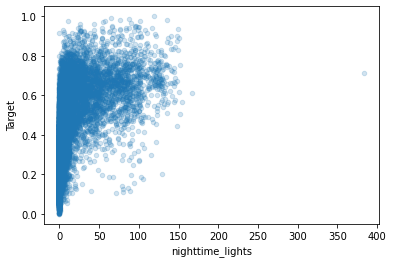

In [5]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

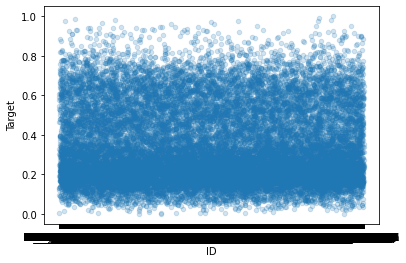

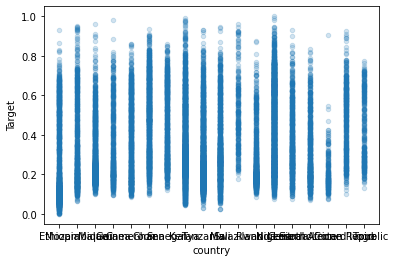

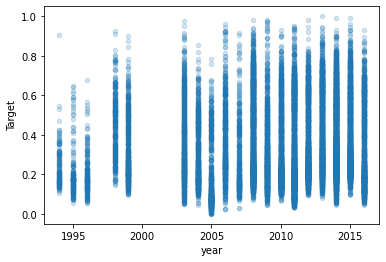

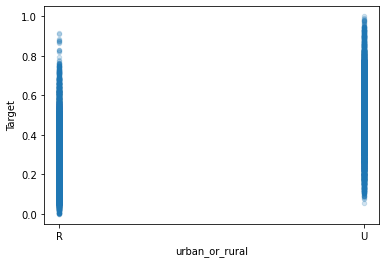

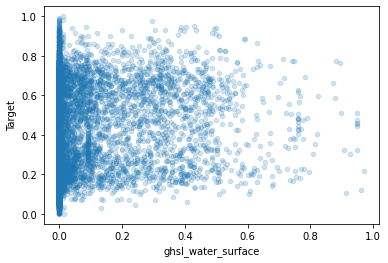

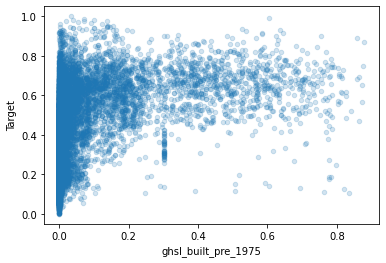

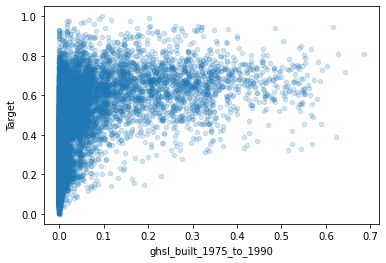

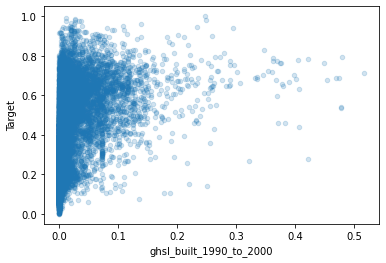

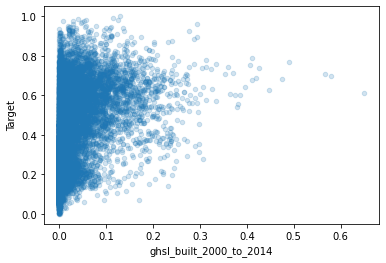

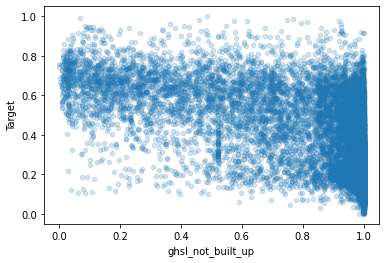

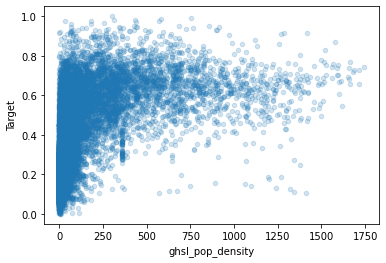

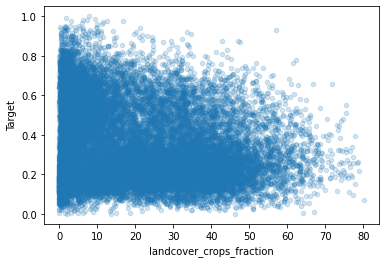

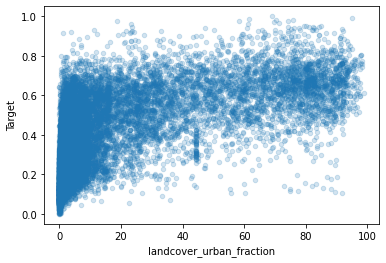

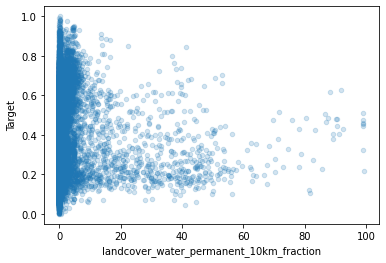

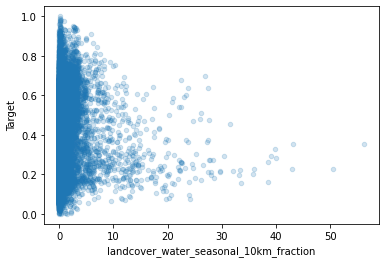

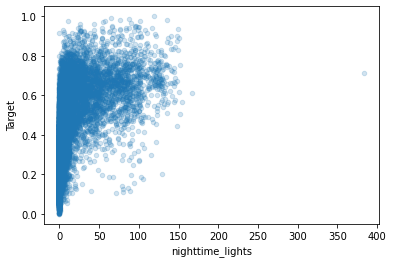

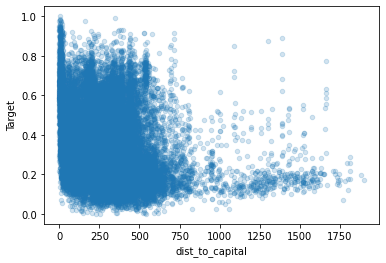

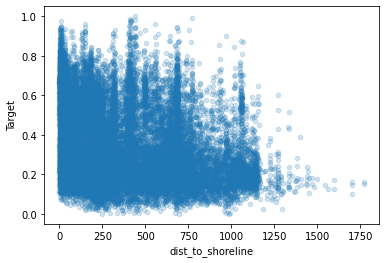

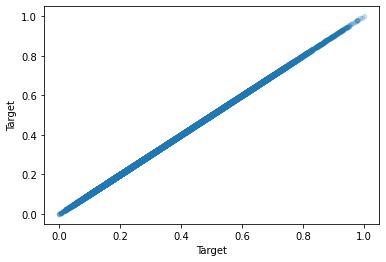

In [6]:
# Exercise: Try this with different inputs. Any unexpected trends?

for var in train.columns:
    train.plot(x=var, y='Target', kind='scatter', alpha=0.2)

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

<AxesSubplot:title={'center':'Target'}, xlabel='urban_or_rural'>

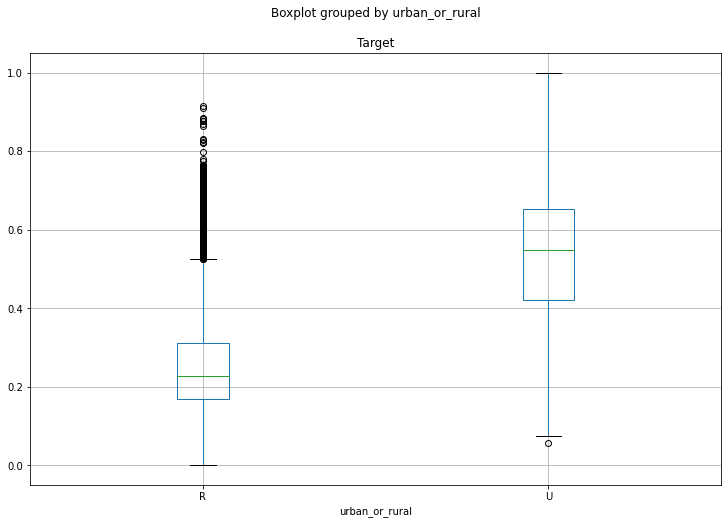

In [7]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

<AxesSubplot:xlabel='country'>

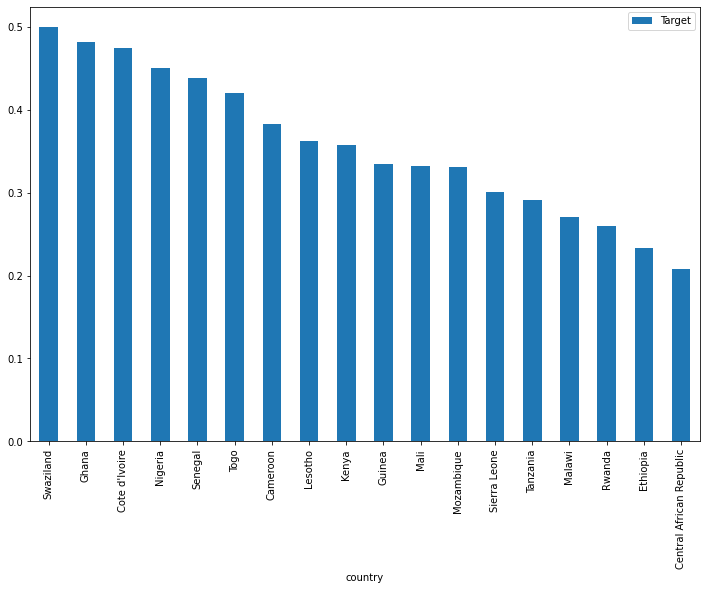

In [8]:
# Exercise: which is the country with the highest average wealth_index according to this dataset?

# to estimate this, we draw a barplot with x as country and y as target (wealth index)
country_df = train.groupby(['country'])['Target'].mean().reset_index()
country_df.sort_values(by='Target', ascending=False, inplace=True)
country_df.plot(x='country', y='Target', kind='bar', figsize=(12, 8))

The country with the highest average wealth_index according to this dataset is **Swaziland**.

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

Now the scary question: do we have missing data to deal with?

In [9]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

See what other trends you can uncover - we have only scratched the surface here. 

In [10]:
# Exercise: explore the data further

print("The data types in our dataset are: \n\n" + str(train.dtypes) + "\n\n")

The data types in our dataset are: 

ID                                          object
country                                     object
year                                         int64
urban_or_rural                              object
ghsl_water_surface                         float64
ghsl_built_pre_1975                        float64
ghsl_built_1975_to_1990                    float64
ghsl_built_1990_to_2000                    float64
ghsl_built_2000_to_2014                    float64
ghsl_not_built_up                          float64
ghsl_pop_density                           float64
landcover_crops_fraction                   float64
landcover_urban_fraction                   float64
landcover_water_permanent_10km_fraction    float64
landcover_water_seasonal_10km_fraction     float64
nighttime_lights                           float64
dist_to_capital                            float64
dist_to_shoreline                          float64
Target                                     fl

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'ghsl_water_surface'}>,
        <AxesSubplot:title={'center':'ghsl_built_pre_1975'}>,
        <AxesSubplot:title={'center':'ghsl_built_1975_to_1990'}>],
       [<AxesSubplot:title={'center':'ghsl_built_1990_to_2000'}>,
        <AxesSubplot:title={'center':'ghsl_built_2000_to_2014'}>,
        <AxesSubplot:title={'center':'ghsl_not_built_up'}>,
        <AxesSubplot:title={'center':'ghsl_pop_density'}>],
       [<AxesSubplot:title={'center':'landcover_crops_fraction'}>,
        <AxesSubplot:title={'center':'landcover_urban_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_permanent_10km_fraction'}>,
        <AxesSubplot:title={'center':'landcover_water_seasonal_10km_fraction'}>],
       [<AxesSubplot:title={'center':'nighttime_lights'}>,
        <AxesSubplot:title={'center':'dist_to_capital'}>,
        <AxesSubplot:title={'center':'dist_to_shoreline'}>,
        <AxesSubplot:title={'center'

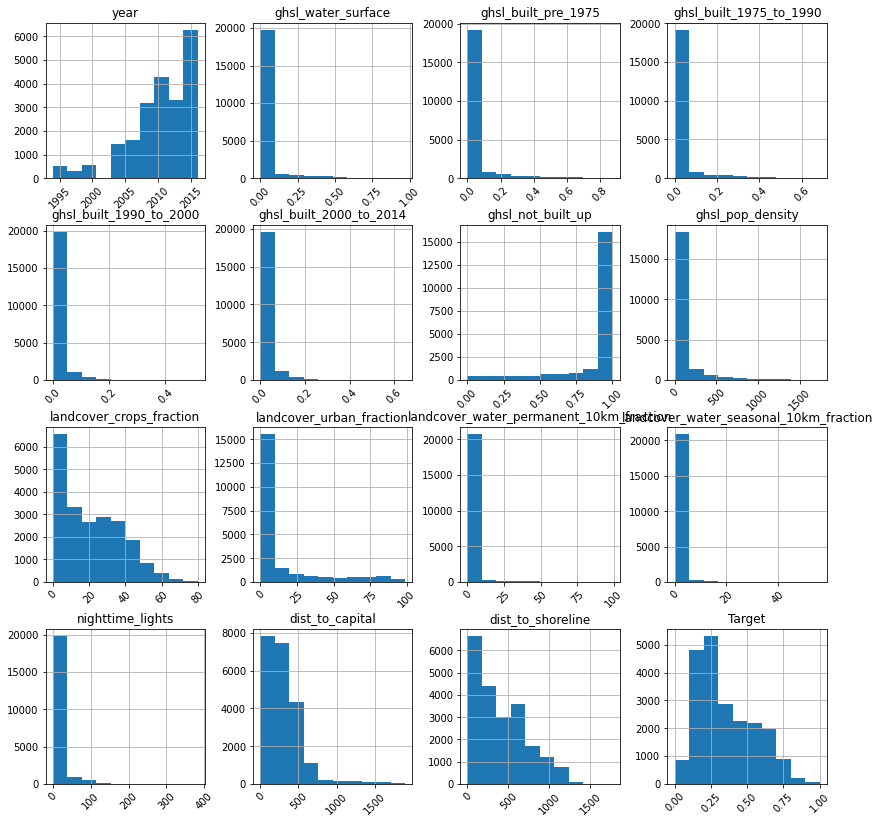

In [11]:
"""Distribution of values in the numerical variables to visualize the presence of outliers"""
train.hist(figsize=(14,14), xrot=45)

In [12]:
"""Summary statistics of the numerical variables"""
train.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,2010.060874,0.028259,0.038222,0.028644,0.012689,0.018386,0.873800,95.756775,21.034265,13.999061,1.486849,0.714891,8.506543,289.722268,402.608539,0.350736
std,4.799579,0.097490,0.113562,0.077367,0.032745,0.040421,0.239294,209.704761,16.751106,23.715485,6.550171,2.383701,21.090378,238.811778,321.517285,0.194376
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105306,0.112080,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000043,0.000124,0.897867,3.848533,5.610515,0.798841,0.000000,0.001325,0.000000,115.890873,126.379463,0.195772
50%,2011.000000,0.000000,0.000198,0.000709,0.001001,0.001871,0.991919,17.632672,18.509291,2.770159,0.000516,0.029151,0.137333,256.736472,327.271973,0.293574
75%,2014.000000,0.000000,0.007987,0.009868,0.008128,0.014936,0.999532,63.225683,33.590293,12.621501,0.152364,0.381969,4.830194,401.153071,643.910675,0.499003
max,2016.000000,0.969956,0.877116,0.685010,0.515534,0.649159,1.000000,1741.256516,80.064918,98.784092,99.164018,56.201637,382.932769,1897.351575,1769.523906,1.000000


In [13]:
"""Summary statistics of the categorical variables"""
train.describe(include="object")

,ID,country,urban_or_rural
count,21454,21454,21454
unique,21454,18,2
top,ID_WKKEVdpw,Nigeria,R
freq,1,2695,14061


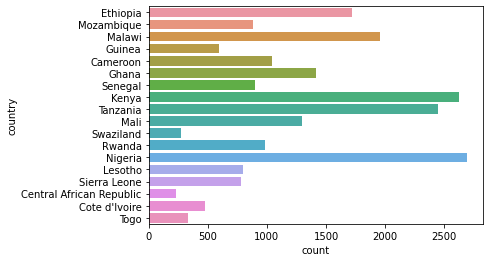

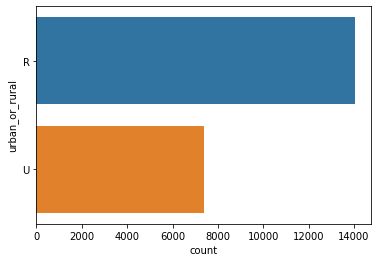

In [14]:
"""Let's also plot our categorical features. We'll only include variables with a small number of unique values"""
import seaborn as sns
import matplotlib.pyplot as plt

for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 20:
        sns.countplot(y=column, data=train)
        plt.show()

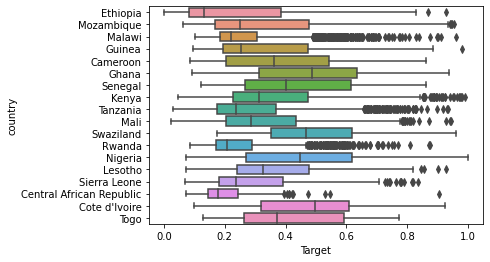

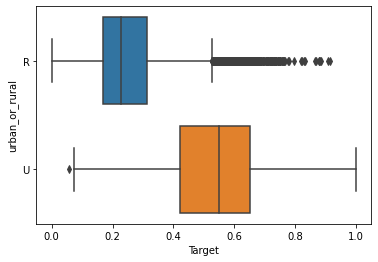

In [15]:
"""
Observing the relationship between our categorical and numerical features.
Let's see how our target compares to the categorical features. Again we will only use
categorical features with a small number of unique values.
"""

for column in train.select_dtypes(include='object'):
 if train[column].nunique() < 20:
     sns.boxplot(y=column, x='Target', data=train)
     plt.show()

In [16]:
"""
Observing the relationship between the categorical features and the other numerical features.
"""
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 20:
        display(train.groupby(column).agg(['mean','std']))

year           ghsl_water_surface            \
                                 mean       std               mean       std   
country                                                                        
Cameroon                  2007.879923  3.480991           0.013501  0.056570   
Central African Republic  1994.389610  0.488721           0.026922  0.043317   
Cote d'Ivoire             2007.962578  6.114076           0.038647  0.100821   
Ethiopia                  2010.966299  4.482268           0.002658  0.025947   
Ghana                     2008.178295  6.721851           0.044044  0.122646   
Guinea                    2005.576728  6.505034           0.067622  0.177058   
Kenya                     2011.597106  4.153151           0.020905  0.080791   
Lesotho                   2011.584383  2.441974           0.000019  0.000088   
Malawi                    2012.738375  2.511125           0.029123  0.114016   
Mali                      2006.869498  6.937174           0.015790  0.035976   
Mozambique                2010.385666  0.923164           0.047951  0.122235   
Nigeria                   2009.995176  3.717519           0.010324  0.049399   
Rwanda                    2012.537602  2.148270           0.020253  0.078359   
Senegal                   2010.260244  1.658761           0.054720  0.122130   
Sierra Leone              2010.770701  2.486886           0.065320  0.149463   
Swaziland                 2006.240741  0.428327           0.002097  0.012835   
Tanzania                  2010.427755  3.665568           0.051095  0.131007   
Togo                      2013.609091  0.488695           0.034968  0.096883   

                         ghsl_built_pre_1975            \
                                        mean       std   
country                                                  
Cameroon                            0.089368  0.174344   
Central African Republic            0.070717  0.115217   
Cote d'Ivoire                       0.162686  0.245715   
Ethiopia                            0.013583  0.042208   
Ghana                               0.098686  0.187980   
Guinea                              0.067270  0.129798   
Kenya                               0.007946  0.027737   
Lesotho                             0.001462  0.002913   
Malawi                              0.015021  0.040178   
Mali                                0.020033  0.047473   
Mozambique                          0.027496  0.062590   
Nigeria                             0.054617  0.135394   
Rwanda                              0.004300  0.011724   
Senegal                             0.042119  0.101091   
Sierra Leone                        0.035761  0.061537   
Swaziland                           0.001661  0.002909   
Tanzania                            0.034164  0.135302   
Togo                                0.078440  0.143427   

                         ghsl_built_1975_to_1990            \
                                            mean       std   
country                                                      
Cameroon                                0.041253  0.076660   
Central African Republic                0.005190  0.012682   
Cote d'Ivoire                           0.014305  0.032872   
Ethiopia                                0.021729  0.063283   
Ghana                                   0.048815  0.096029   
Guinea                                  0.033946  0.078440   
Kenya                                   0.014812  0.046479   
Lesotho                                 0.022933  0.068535   
Malawi                                  0.008087  0.016244   
Mali                                    0.058798  0.136728   
Mozambique                              0.067428  0.146448   
Nigeria                                 0.046009  0.092708   
Rwanda                                  0.024649  0.068896   
Senegal                                 0.033060  0.067998   
Sierra Leone                            0.017501  0.032997   
Swaziland        

year           ghsl_water_surface            \
                       mean       std               mean       std   
urban_or_rural                                                       
R               2010.192874  4.637982           0.016677  0.079135   
U               2009.809820  5.083670           0.050286  0.122196   

               ghsl_built_pre_1975           ghsl_built_1975_to_1990  \
                              mean       std                    mean   
urban_or_rural                                                         
R                         0.003085  0.017811                0.004091   
U                         0.105051  0.173231                0.075341   

                         ghsl_built_1990_to_2000            ...  \
                     std                    mean       std  ...   
urban_or_rural                                              ...   
R               0.021307                0.003386  0.015975  ...   
U               0.114807                0.030383  0.046354  ...   

               landcover_water_seasonal_10km_fraction            \
                                                 mean       std   
urban_or_rural                                                    
R                                            0.595652  2.417225   
U                                            0.941675  2.301779   

               nighttime_lights            dist_to_capital              \
                           mean        std            mean         std   
urban_or_rural                                                           
R                      1.178445   6.429075      308.821070  234.791067   
U                     22.444104  30.263134      253.397603  242.171847   

               dist_to_shoreline                Target            
                            mean         std      mean       std  
urban_or_rural                                                    
R                     441.945650  319.907051  0.255153  0.128099  
U                     327.791939  311.143257  0.532530  0.167351  

[2 rows x 32 columns]

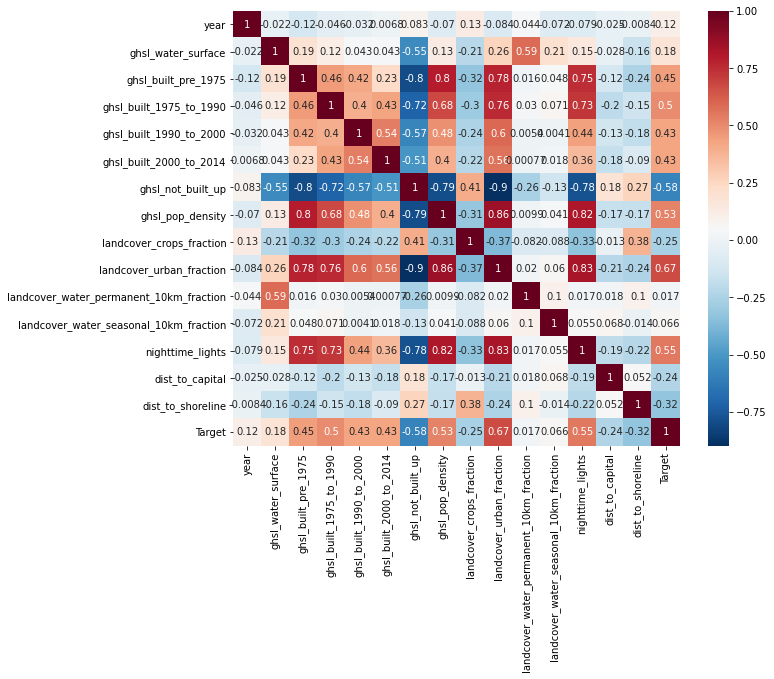

In [17]:
"""
Relationship between numerical features
"""

corrs = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

# Modelling

We've had a look at our data and it looks good! Let's see if we can create a model to predict the Target given some of our inputs. To start with we will use only the numeric columns, so that we can fit a model right away. 

In [18]:
in_cols = list(train.columns[4:-1])
print('Input columns:', in_cols)

Input columns: ['ghsl_water_surface', 'ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density', 'landcover_crops_fraction', 'landcover_urban_fraction', 'landcover_water_permanent_10km_fraction', 'landcover_water_seasonal_10km_fraction', 'nighttime_lights', 'dist_to_capital', 'dist_to_shoreline']


To evaluate our model, we need to keep some data separate. We will split out data into X (inputs) and y (output) and then further split into train and test sets with the following code:

In [19]:
from sklearn.model_selection import train_test_split

X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent
print(X_train.shape, X_test.shape)

(17163, 14) (4291, 14)


We now have a nice test set of ~4200 rows. We will train our model and then use this test set to calculate our score.

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # Create the model
model.fit(X_train, y_train) # Train it (this syntax looks the same for all sklearn models)
model.score(X_test, y_test) # Show a score

0.6983695923031705

What is the score above? The default for regression models is the R^2 score, a measure of how well the mode does at predicting the target. 0.69 is pretty good - let's plot the predictions vs the actual values and see how close it looks to a straight line:

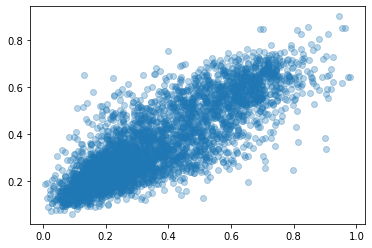

In [21]:
from matplotlib import pyplot as plt
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

This looks great - most predictions are nice and close to the true value! But we still don't have a way to link this to the leaderboard score on Zindi. Let's remedy that by calculating the Root Mean Squared Error, the same metric Zindi uses. 

In [22]:
from sklearn.metrics import mean_squared_error, accuracy_score

# The `squared=False` bit tells this function to return the ROOT mean squared error
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.10821611543505405

Great stuff. Let's make a submission and then move on to looking for ways to improve.

In [23]:
# Copying our predictions into the submission dataframe - make sure the rows are in the same order!
ss['Target'] = model.predict(test[in_cols]) 
ss.head()

,ID,Target
0,ID_AAcismbB,0.171129
1,ID_AAeBMsji,0.147095
2,ID_AAjFMjzy,0.616712
3,ID_AAmMOEEC,0.300320
4,ID_ABguzDxp,0.279739


We now have our predictions in the right format to submit. The following line saves this to a file that you can then upload to get a score:

In [24]:
ss.to_csv('first_submission.csv', index=False)

# Getting Better

You might have noticed that your score on Zindi wasn't as good as the one you got above. This is because the test set comes from different countries to the train set. When we did a random split, we ended up with our local train and test both coming from the same countries - and it's easier for a model to extrapolate within countries than it is for it to make predictions for a new location. 

So our first step might be to make a scoring function that splits the data according to country, and measures the model performance on unseen countries. Try it and share your testing methods in the discussions. And look at the following questions:
- Does your score drop when you score your model on countries it wasn't trained with?
- Does the new score more accurately match the leaderboard score?
- Are any countries particularly 'hard' to make predictions in?

In [29]:
# You code for a enw model evaluation method here

def split_by_country(df):
    """take in a dataframe and split into new dataframes by country"""
    d = {}
    val_x = train[train.index.isin(df.index)]
    countries = val_x['country'].unique()
    for country in countries:
        d[f'{country}'] = val_x[val_x['country']==country]
    return d

def model_performance(df_country):
    """measure model performance"""
    country = df_country.country.unique()
    kfold = model_selection.KFold(n_splits=5, random_state=58)
    mse = mean_squared_error(df_country['Target'], model.predict(df_country[in_cols]),  squared=False)
    accuracy = model_selection.cross_val_score(model, df_country[in_cols], df_country['Target'], cv=kfold)
    accuracy = accuracy.mean()*100
    country_accuracy = {'country': country[0], 'MSE': mse, 'accuracy': accuracy}
    return country_accuracy

def evaluate_model_per_country(df):
    """this function takes a dataframe, splits the data according to country and scores the model by country"""
    j = split_by_country(df)
    scores = []
    for item in j:
        result = model_performance(j[item])
        scores.append(result)
    scores_df = pd.DataFrame(scores)
    return scores_df

evaluate_model_per_country(X_test)

/Users/erickamau/PycharmProjects/ADS/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/erickamau/PycharmProjects/ADS/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/erickamau/PycharmProjects/ADS/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/erickamau/PycharmProjects/ADS/venv/lib/python3.8/site-packages/

,country,MSE,accuracy
0,Ethiopia,0.102171,76.155548
1,Nigeria,0.118428,63.351445
2,Lesotho,0.096641,58.835548
3,Mozambique,0.104707,72.070489
4,Malawi,0.094137,50.565984
5,Ghana,0.127708,57.914300
6,Kenya,0.110089,55.320814
7,Cote d'Ivoire,0.121991,41.802927
8,Sierra Leone,0.074781,79.983638
9,Senegal,0.103654,68.015857


Knowing how well our model is doing is useful, but however you measure that we also need ways to improve this performance! There are a few ways to do this:

- Feed the model better data. How? Feature engineering! If we can add meaningful features the model will have more data to work with.
- Tune your models. We used the default parameters - perhaps we can tweak some hyperparameters to make our models better
- Try fancier models. Perhaps XGBoost or a neural network is better than Random Forest at this task

Let's do a little of each. First up, let's create a numeric feature that encodes the 'urban_or_rural' column as something the model can use:

In [ ]:
# Turning a categorical column into a numeric feature
train['is_urban'] = (train['urban_or_rural'] == 'U').astype(int)
test['is_urban'] = (test['urban_or_rural'] == 'U').astype(int)
train.head()


Note that whenever we add features to train, *we also need to add them to test* otherwise we won't be able to make our predictions.

With this extra feature, we can fit a new model:

In [ ]:
in_cols.append('is_urban') # Adding the new features to our list of input columns

# Replace this with your chosen method for evaluating a model:
X, y = train[in_cols], train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)
model = RandomForestRegressor()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test), squared=False)

Did your score improve?

Next, let's tune our model by adjusting the maximum depth. This is one of many hyperparameters that can be tweaked on a Random Forest model. Here I just try a few randomly chosen values, but you could also use a grid search to try values more methodically.

In [ ]:
for max_depth in [3, 5, 8, 10, 14, 18]:
    model = RandomForestRegressor()
    # Again, you van use a better method to evaluate the model here...
    model.fit(X_train, y_train)
    print(max_depth, mean_squared_error(y_test, model.predict(X_test), squared=False))

In this case, it looks like we can improve our performance by specifying a max_depth to limit model complexity.

Finally, let's try a different model out of curiosity:

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
# Exercise: fit and score the model. Does it beat your other scores? Can you use it to make a submission?

Remember, you can ask questions and share ideas in the discussions. 

### GOOD LUCK!